# Proyecto final de TripleTen


Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

### Inicialización:

Como primer punto se va a realizar la carga de las librerías necesarias para realizar el proyecto:

In [1]:
import math
from scipy import stats as st
import time
import random 

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from functools import reduce # Para hacer el merge de varios dataframes

from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
%config InlineBackend.figure_format = 'retina' ## Estaba comentado

plt.style.use('seaborn')

### Carga de datos
A continuación se realizará la importación de la base de datos. Para este proyecto se tienen cuatro diferentes tipos de bases de datos:

**Base de datos sobre el contrato**

In [3]:
contract_df = pd.read_csv('/datasets/final_provider/contract.csv')
contract_df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


**Base de datos sobre servicios de internet**

In [4]:
internet_df = pd.read_csv('/datasets/final_provider/internet.csv')
internet_df

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


**Base de datos sobre información personal**

In [5]:
personal_df = pd.read_csv('/datasets/final_provider/personal.csv')
personal_df

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


**Base de datos sobre información de número de líneas**

In [6]:
phone_df = pd.read_csv('/datasets/final_provider/phone.csv')
phone_df

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


#### Observaciones sobre las bases de datos importadas**


Para el presente proyecto fueron entregadas 4 bases de datos, las cuales contienen características particulares para los clientes. 
En la base de datos denominada "contract_df" se tiene datos sobre su contrato, tales como tiempo de inicio y fin, tipo de contrato (anual o mensual), forma de facturación, tipo de pago y, costos mensuales y totales del plan
En la base de datos "internet_df" se observa características de un contrato de internet, donde se puede detectar los tipos de plan y microservicios ofrecidos a los clientes (OnlineSecurity, OnlineBackup,	DeviceProtection, TechSupport, StreamingTV, StreamingMovies)
En la base de datos "personal_df" se tiene información personal de los clientes, que incluye datos como género, si son personas de la tercera edad, si tienen parjea o si tienen personas dependientes.
Finalmente en la base de datos "phone_df" indica si tiene múltiples cuentas o no.


Se ha observado que todas las bases de datos tienen como dato que los une "customerID", por lo que se decidió unir todos los dataframes en uno solo para realizar el análisis de datos:

In [7]:
dataframes = [contract_df, internet_df, personal_df, phone_df]

# Función para fusionar dos DataFrames
def merge_dataframes(left,right):
    return pd.merge(left, right, on = "customerID", how='outer')

# Unir los DataFrames iterativamente
total_df = reduce(merge_dataframes, dataframes)
total_df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Fiber optic,No,No,No,No,No,No,Male,1,Yes,No,Yes


Con esta union de tablas de datos obtenemos un dataframe con toda la información completa. Nos muestra 7043 registros. Algunos registros tendran datos NaN dado que los dataframes que se juntaron no tenían la misma cantidad de filas, lo cual significa que algunos usuarios no tienen toda la información completa o no estan suscritos a los mismos tipos de servicios

Ahora que tenemos una sola base de datos se va a realizar un Analisis Exploratorio de Datos:

### Preprocesamiento de datos

A continuación se va a estudiar como se encuentra la información cargada. La información viene de distintas fuentes, por lo que es necesario revisar si existe algun tipo de error  Como primer punto se va a observar si el tipo de dato es el adecuado para cada columna: 

In [8]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


#### Verificación de datos duplicados

Vamos a revisar si existen codigos de clientes duplicados, los cuales será necesario eliminar:

In [9]:
total_df.duplicated().sum()

0

Se ha verificado que no existen datos duplicados

#### Correción de tipo de datos

Utilizando la función .info se observa que existen columnas cuyo tipo de dato no corresponde a la característica que representa, iniciando por las columnas BeginDate y EndDate, los cuales debería ser una columna de tipo fecha

In [10]:
total_df['BeginDate'] = pd.to_datetime(total_df['BeginDate'])
total_df['BeginDate']

0      2020-01-01
1      2017-04-01
2      2019-10-01
3      2016-05-01
4      2019-09-01
          ...    
7038   2018-02-01
7039   2014-02-01
7040   2019-03-01
7041   2019-07-01
7042   2014-08-01
Name: BeginDate, Length: 7043, dtype: datetime64[ns]

In [11]:
total_df['EndDate'] = pd.to_datetime(total_df['EndDate'], errors = 'coerce') #  # Coerción para manejar valores no válidos
total_df['EndDate'].fillna(pd.NaT, inplace = True)
total_df['EndDate']

0             NaT
1             NaT
2      2019-12-01
3             NaT
4      2019-11-01
          ...    
7038          NaT
7039          NaT
7040          NaT
7041   2019-11-01
7042          NaT
Name: EndDate, Length: 7043, dtype: datetime64[ns]

Vamos a revisar en que rangos se encuentran las fechas de inicio y final de los contratos:

In [12]:
# Obtener el rango de fechas en la columna BeginDate
fecha_inicio_min = total_df['BeginDate'].min()
fecha_inicio_max = total_df['BeginDate'].max()

# Obtener el rango de fechas en la columna EndDate
fecha_fin_min = total_df['EndDate'].min()
fecha_fin_max = total_df['EndDate'].max()

# Imprimir los rangos de fechas
print("Rango de fechas en la columna BeginDate:")
print("Fecha mínima:", fecha_inicio_min)
print("Fecha máxima:", fecha_inicio_max)
print("\nRango de fechas en la columna EndDate:")
print("Fecha mínima:", fecha_fin_min)
print("Fecha máxima:", fecha_fin_max)

Rango de fechas en la columna BeginDate:
Fecha mínima: 2013-10-01 00:00:00
Fecha máxima: 2020-02-01 00:00:00

Rango de fechas en la columna EndDate:
Fecha mínima: 2019-10-01 00:00:00
Fecha máxima: 2020-01-01 00:00:00


Este rango nos servirá para analisis posteriores.

Otra columna que tiene datos con un tipo erroneo es la columna de "TotalCharges". Esto es el costo total y debería ser un número al igual que el tipo de dato de la columna: "MonthlyCharges", por lo tanto lo vamos a cambiar a float. Inicialmente se obtuvo un error que indica que la columna 'TotalCharges' tiene datos vacios o " ", por lo que vamos a reemplazar primero esos datos por valores NaN:

In [13]:
total_df['TotalCharges'].replace(" ", np.nan, inplace = True)
total_df['TotalCharges'] = total_df['TotalCharges'].astype(float)
total_df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [14]:
total_df['TotalCharges'].isna().sum()

11

En esta columna se tiene 11 filas con datos NaN. A continuación se analizará que hacer con los datos ausentes:

#### Correción de datos ausentes

Despues de unir todas las bases de datos en un solo dataframe podemos observar que existen 7043 usuarios de los servicios de telecomunicaciones, por lo que deberiamos esperar esa cantidad de filas para todos los datos, sin embargo existen columnas que no tienen esa cantidad de datos, por lo que vamos a analizar estos problemas:

En el caso de la Base de datos sobre servicios de internet se tienen 5517 filas en total, lo cual nos indica que esta base de datos solo recoge información sobre clientes que tienen alguno de estos servicios ofrecidos, en el caso de no tener ninguno, simplemente no estan en la lista, por lo tanto podemos rellenar los valores ausentes que se generan al unir las bases de datos con un "No"

In [15]:
internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
total_df[internet_services] = total_df[internet_services].fillna("No")

In [16]:
total_df[internet_services].isna().sum()

OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Con este paso se eliminó los datos ausentes para las columnas mencionadas. El proximo paso es revisar que hacer con los datos ausentes de la columna "TotalCharges". Dado que se tienen pocos datos ausentes, se podría optar por eliminar estas filas, sin embargo se ha considerado que la mejor opción sería realizar un calculo del coste mensual y la cantidad de meses que el cliente tiene contratado el servicio. Este proceso sera realizado posteriormente ya que se requiere de datos adicionales.


### Análisis exploratorio de datos:

A continuación se va a realizar un análisis exploratorio de los datos con el fin de obtener información más ordenada de el dataframe generado.


#### Agregando columna "estado_contrato"

Como primer punto vamos a generar nuevas columnas que den más información en base a los datos que se tienen. A continuación se va a crear una columna que indique el estado del contrato.
En esta sección se realiza las siguientes operaciones:

- Crea una nueva columna 'EstadoContrato' que indica si el contrato está activo o no en cada fecha. Si EndDate es NaT, el contrato está activo.
- Agrupa los datos por la fecha de inicio del contrato y calcula el recuento acumulado de contratos activos para cada fecha utilizando el método cumsum().
- Traza el gráfico de series temporales utilizando matplotlib.pyplot.

Con esto se observa que hasta el ultimo día que se recogío información se tienen que existen 5174 contratos activos.

In [17]:
# Crear una nueva columna 'estado_contrato' que indique si el contrato está activo o no en cada fecha
# Si EndDate es NaT (fecha nula), el contrato está activo
total_df['estado_contrato'] = total_df['EndDate'].isnull()
total_df['estado_contrato']

0        True
1        True
2       False
3        True
4       False
        ...  
7038     True
7039     True
7040     True
7041    False
7042     True
Name: estado_contrato, Length: 7043, dtype: bool

Vamos a revisar de forma gráfica un recuento acumulado de los contratos activos.

In [18]:
# Crear una serie temporal que contenga el recuento acumulado de contratos activos para cada fecha
# Usamos el método cumsum() para calcular el recuento acumulado
serie_temporal = total_df.groupby('BeginDate')['estado_contrato'].sum().cumsum()


In [19]:
serie_temporal

BeginDate
2013-10-01       0
2013-11-01       0
2013-12-01       0
2014-01-01       0
2014-02-01     356
              ... 
2019-10-01    4709
2019-11-01    4815
2019-12-01    4930
2020-01-01    5163
2020-02-01    5174
Name: estado_contrato, Length: 77, dtype: int64

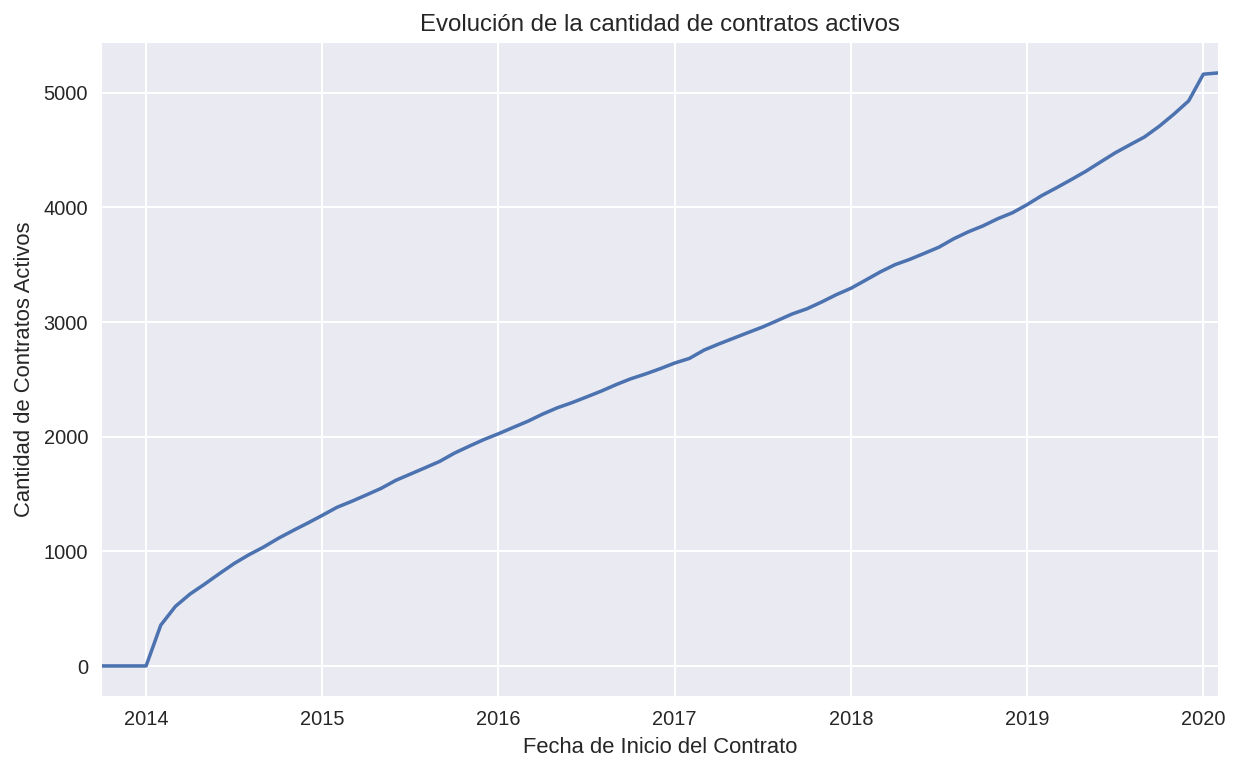

In [20]:
plt.figure(figsize=(10, 6))
serie_temporal.plot()
plt.title('Evolución de la cantidad de contratos activos')
plt.xlabel('Fecha de Inicio del Contrato')
plt.ylabel('Cantidad de Contratos Activos')
plt.grid(True)
plt.show()

#### Análisis de duracion de contrato

A continuación vamos a hacer un histograma de duración de contrato para analizar la distribución de la duración de los contratos. Esto se realizará mediante restando la fecha de inicio de la fecha de finalización. Los contratos que no tienen fecha de finalización se colocará la fecha máxima del rango de la información, es decir el 2020-02-01, que es el último día del que se tiene registro de contratos.

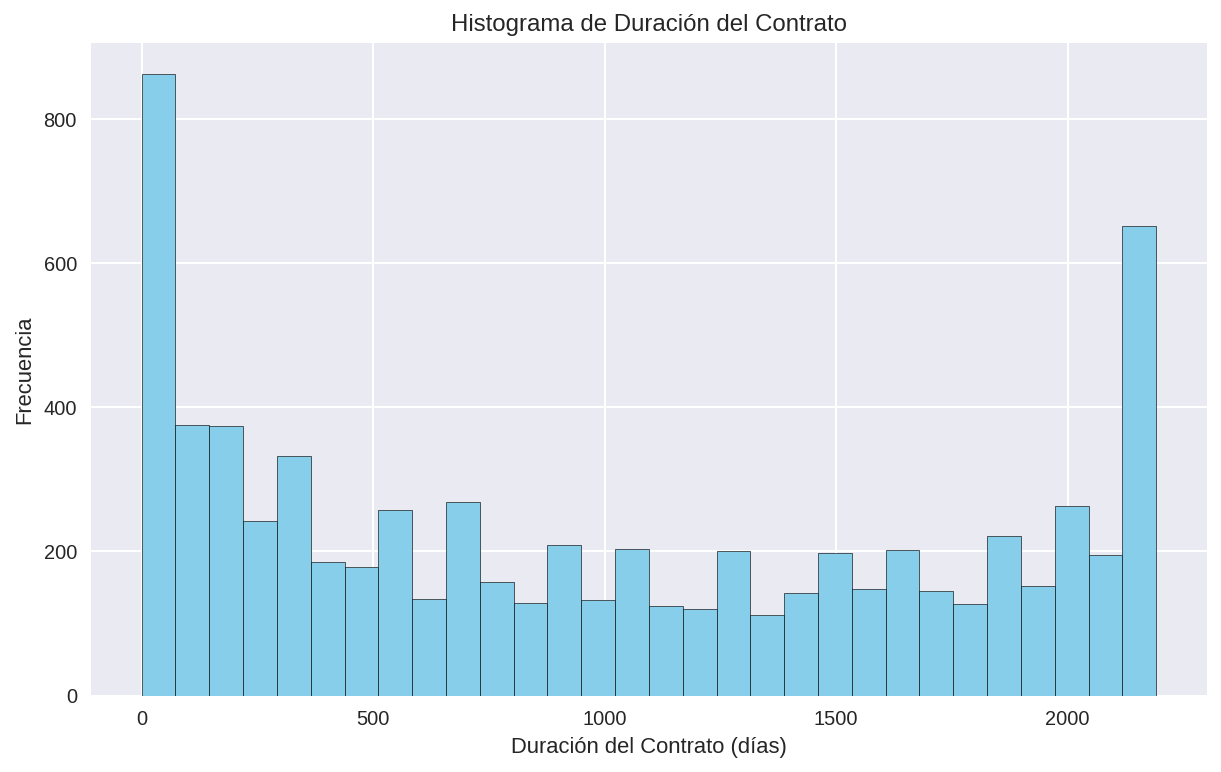

In [21]:
# Llenar los valores NaT en EndDate con la fecha específica (1 de febrero de 2020), crearemos otra columna 
# para no afectar los datos iniciales
fecha_final = pd.to_datetime('2020-02-01')
total_df['EndDate_2'] = total_df['EndDate'].fillna(fecha_final)

# Calcular la duración de los contratos restando la fecha de inicio de la fecha de finalización
total_df['DuracionContrato'] = (total_df['EndDate_2'] - total_df['BeginDate']).dt.days

# Crear el histograma de la duración de los contratos
plt.figure(figsize=(10, 6))
plt.hist(total_df['DuracionContrato'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Duración del Contrato')
plt.xlabel('Duración del Contrato (días)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Observamos que existen muchos contratos que tienen pocos días de duración, esto puede ser causado por muchos contratos que han acabado en poco tiempo o que fueron recientemente contratados. Igualmente hay muchos contratos en el otro extremo que indica, contratos con mucho tiempo vigente

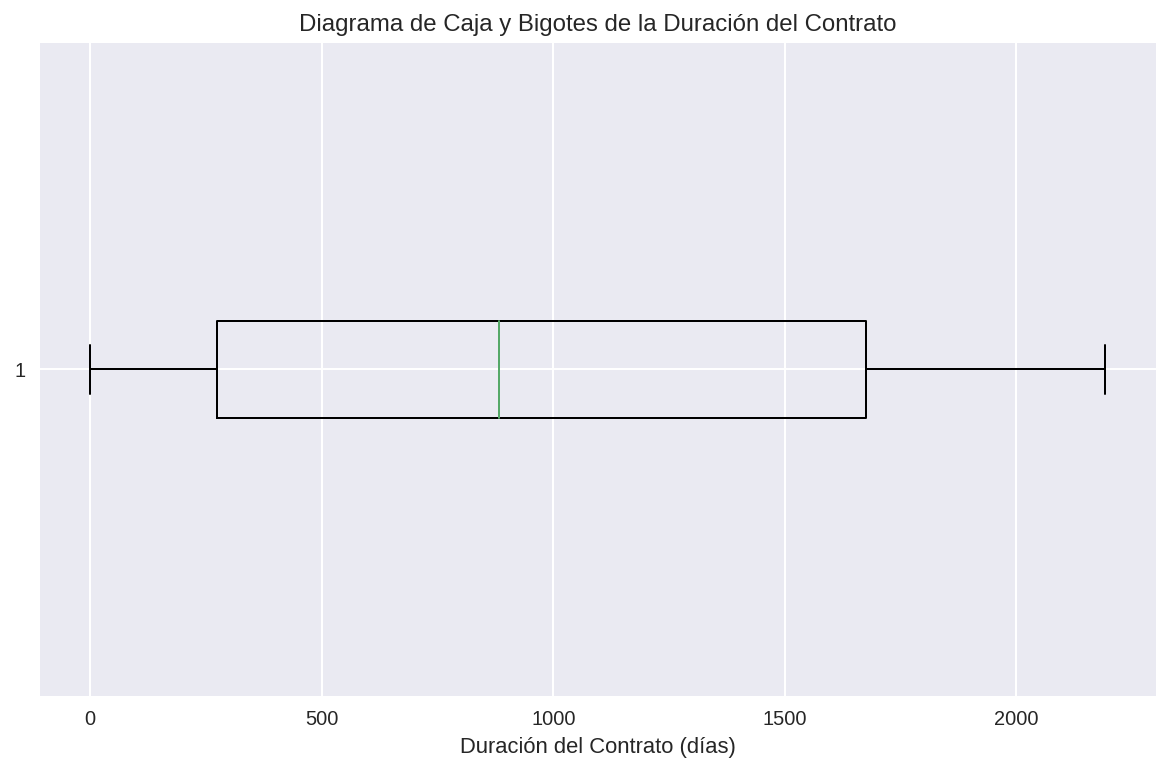

In [22]:
#total_df['DuracionContrato'] = pd.to_numeric(total_df['DuracionContrato'])

# Crear el diagrama de caja y bigotes
plt.figure(figsize=(10, 6))
plt.boxplot(total_df['DuracionContrato'], vert=False)
plt.title('Diagrama de Caja y Bigotes de la Duración del Contrato')
plt.xlabel('Duración del Contrato (días)')
plt.grid(True)
plt.show()

Para este tipo de gráfica se observa que no existen datos anormales ya que todos los datos se encuentran en un rago de tiempo determinado. Utilizando la función describe() se analizará de forma numérica los datos de duración de contrato.

In [23]:
total_df['DuracionContrato'].describe()

count    7043.000000
mean      985.996166
std       747.587844
min         0.000000
25%       273.000000
50%       883.000000
75%      1676.000000
max      2191.000000
Name: DuracionContrato, dtype: float64

#### Análisis de tipo de contrato

Analizando la característica "Type", vamos a analizar cuales son los tipos de contrato que tienen los clientes. Se utilizará la función unique().

In [24]:
total_df['Type'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Se analizará la cantidad de usuarios para cada contrato

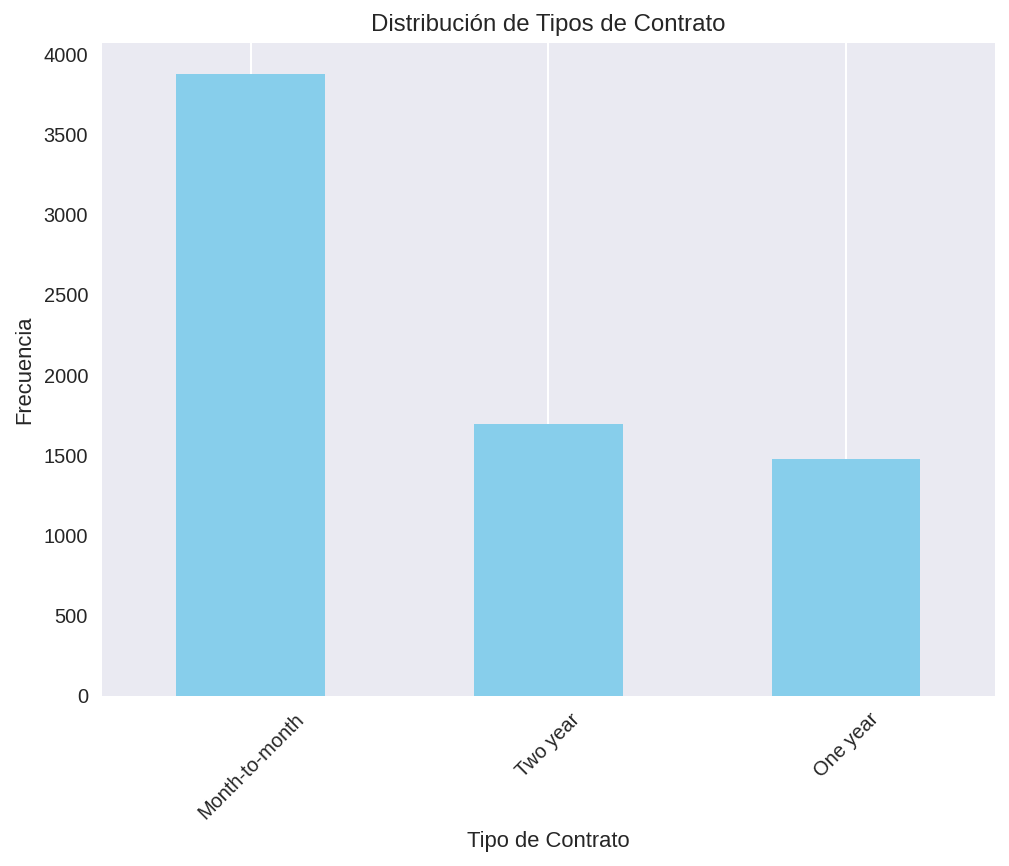

In [25]:
# Calcular la frecuencia de cada tipo de contrato
frecuencia_tipos_contrato = total_df['Type'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
frecuencia_tipos_contrato.plot(kind='bar', color='skyblue')
plt.title('Distribución de Tipos de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Este código calculará la proporción de clientes retenidos para cada tipo de contrato a lo largo del tiempo y trazará un gráfico de retención de clientes por tipo de contrato. Esto te permitirá ver cómo varía la retención de clientes para cada tipo de contrato a medida que pasa el tiempo desde el inicio del contrato.

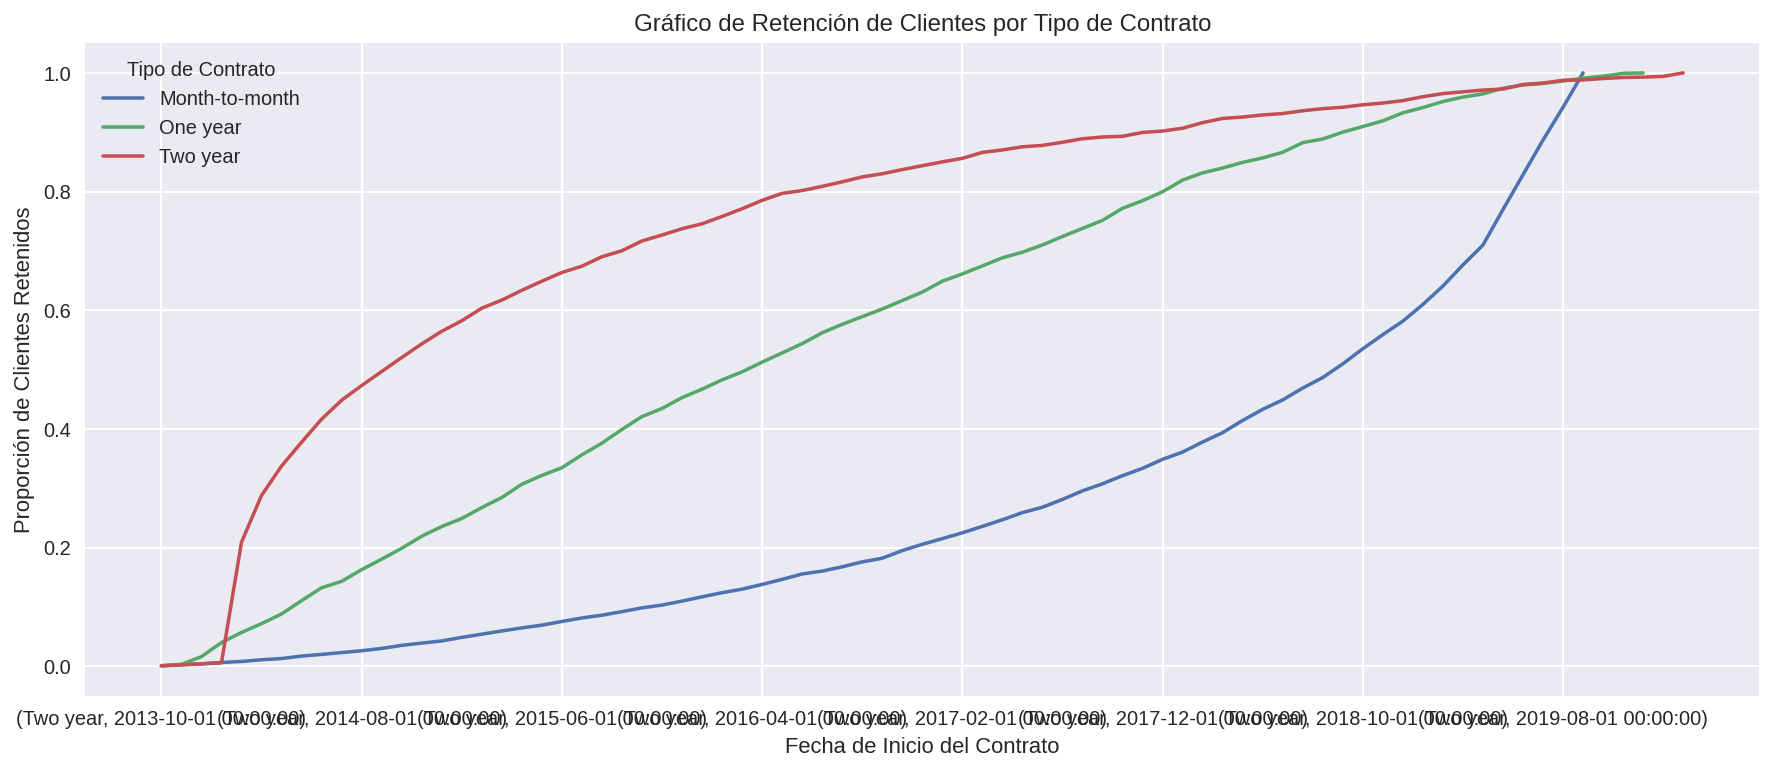

In [26]:
# Calcular la tasa de retención de clientes por tipo de contrato
retencion_por_tipo_contrato = total_df.groupby(['Type', 'BeginDate']).size().groupby(level=0).cumsum()

# Dividir por el total de clientes por tipo de contrato para obtener la proporción de retención
total_clientes_por_tipo_contrato = total_df.groupby('Type').size()
proporcion_retencion = retencion_por_tipo_contrato / total_clientes_por_tipo_contrato

# Trazar el gráfico de retención de clientes por tipo de contrato
plt.figure(figsize=(15, 6))
for tipo_contrato, prop in proporcion_retencion.groupby(level=0):
    prop.plot(label=tipo_contrato)
plt.title('Gráfico de Retención de Clientes por Tipo de Contrato')
plt.xlabel('Fecha de Inicio del Contrato')
plt.ylabel('Proporción de Clientes Retenidos')
plt.legend(title='Tipo de Contrato')
plt.grid(True)
plt.show()

En esta gráfica resultante, se observa que efectivamente el plan que mejor tasa de retención presenta son los de dos años. Con la siguiente gráfica de boxplot, se observa a mayor detalle como

<Figure size 720x432 with 0 Axes>

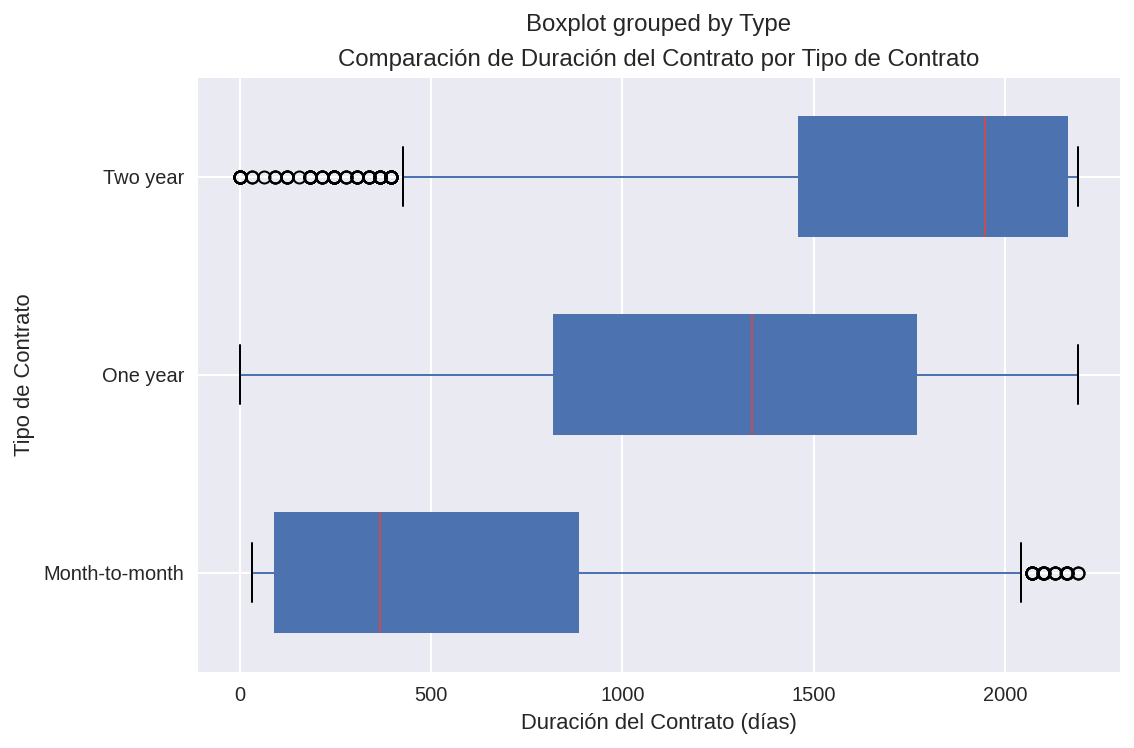

In [27]:
total_df['DuracionContrato'] = pd.to_numeric(total_df['DuracionContrato'])

# Crear el diagrama de caja y bigotes
plt.figure(figsize=(10, 6))
total_df.boxplot(column='DuracionContrato', by='Type', vert=False, patch_artist=True, widths=0.6)
plt.title('Comparación de Duración del Contrato por Tipo de Contrato')
plt.xlabel('Duración del Contrato (días)')
plt.ylabel('Tipo de Contrato')
plt.grid(True)
plt.show()

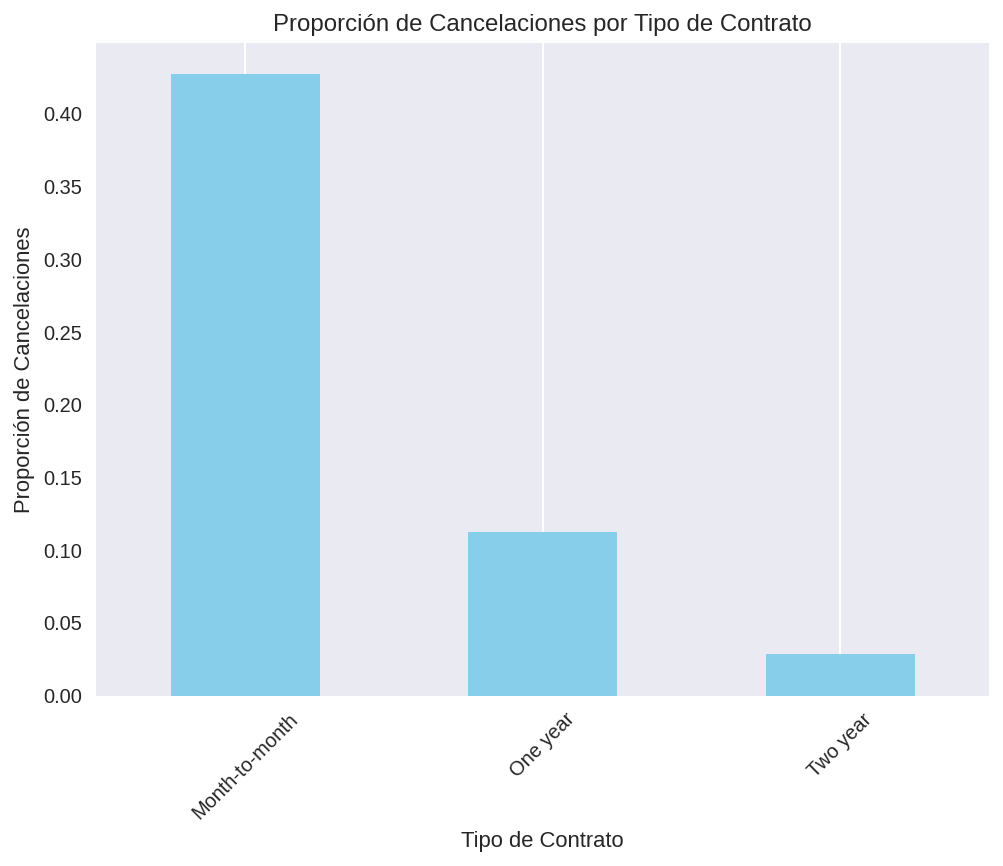

In [28]:
# Crear una columna 'Cancelado' que indique si el contrato fue cancelado
total_df['Cancelado'] = total_df['EndDate'].notnull()

# Calcular la proporción de cancelaciones por tipo de contrato
proporcion_cancelaciones = total_df.groupby('Type')['Cancelado'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
proporcion_cancelaciones.plot(kind='bar', color='skyblue')
plt.title('Proporción de Cancelaciones por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Proporción de Cancelaciones')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Con estos gráficos obtenidos se confirma que los planes que tienen una mayor tasa de cancelación son los planes mensuales

#### Analisis del tipo de facturación y tipos de pago:

Ahora vamos a revisar los datos de las columnas "PaperlessBilling" y "PaymentMethod" para poder extraer información

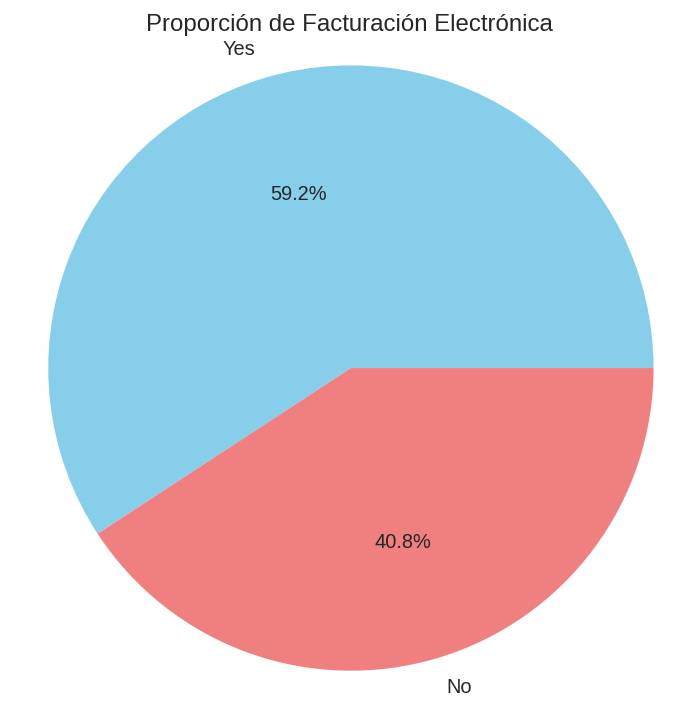

In [29]:

frecuencia_paperless = total_df['PaperlessBilling'].value_counts()

# Crear el diagrama de pastel
plt.figure(figsize=(6, 6))
plt.pie(frecuencia_paperless, labels=frecuencia_paperless.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Facturación Electrónica')
plt.axis('equal')
plt.show()


Se ha observado que en su mayoría los usuarios prefieren facturación electrónica, aunque no es un porcentaje muy superior. Muchas personas sigue prefiriendo una facturación impresa.

Ahora con respecto al tipo de pago:

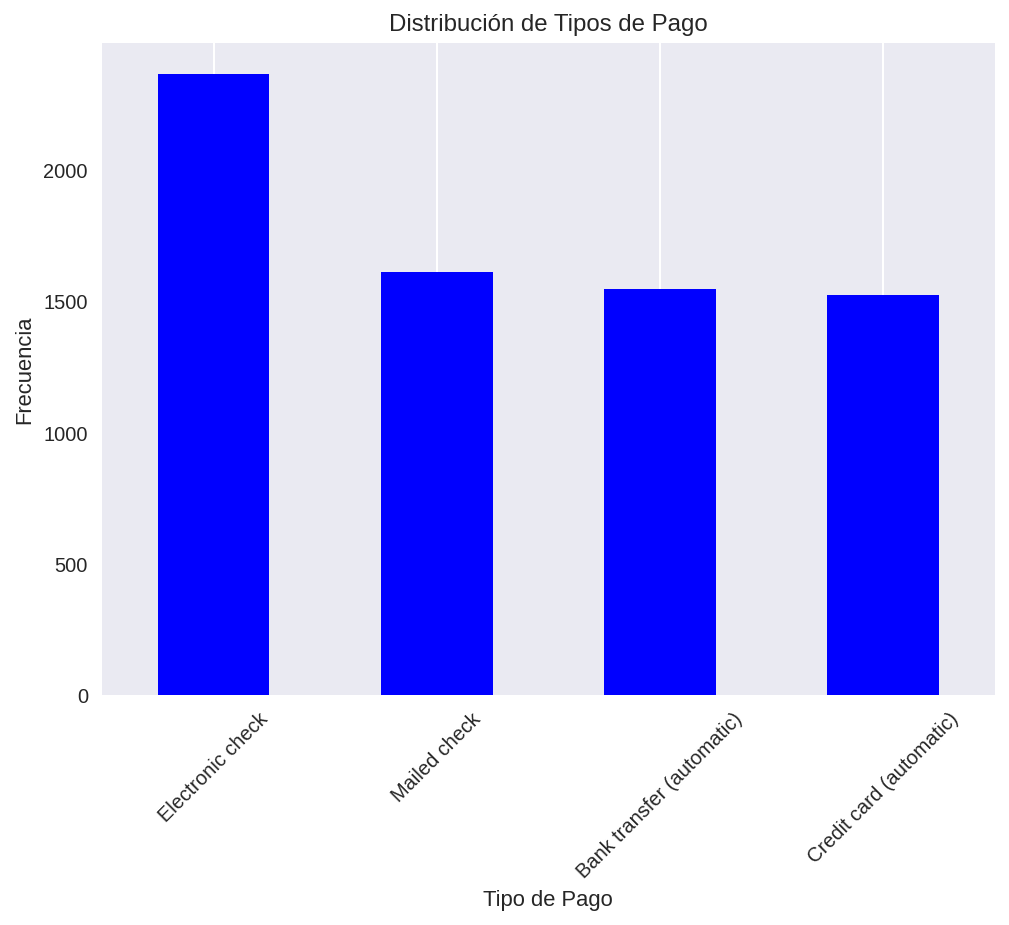

In [31]:
# Calcular la frecuencia de cada tipo de contrato
frecuencia_tipos_pago = total_df['PaymentMethod'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
frecuencia_tipos_pago.plot(kind='bar', color='blue')
plt.title('Distribución de Tipos de Pago')
plt.xlabel('Tipo de Pago')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

El método favorito de los clientes para realizar los pagos es un cheque electrónico. Los demás métodos tienen un porcentaje de popularidad similar.

#### Análisis de cargos mensuales y anuales.

Ahora vamos a revisar como se encuentra la distribución de gastos mensuales y totales para los usuarios de la base de datos:

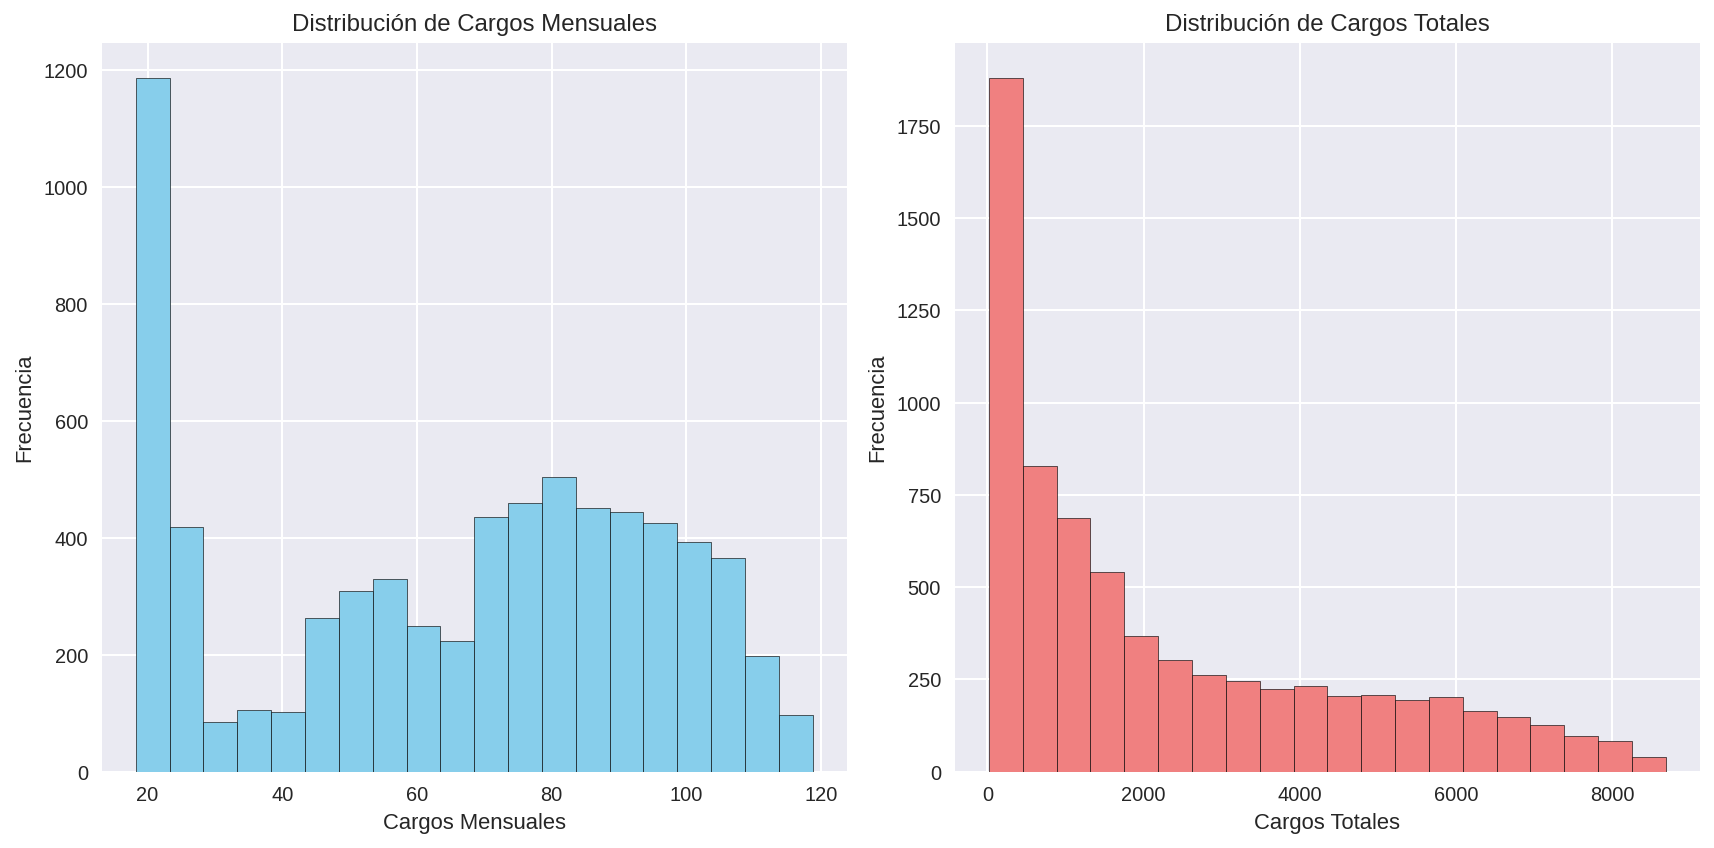

In [32]:
plt.figure(figsize=(12, 6))

# Histograma de cargos mensuales
plt.subplot(1, 2, 1)
plt.hist(total_df['MonthlyCharges'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Cargos Mensuales')
plt.xlabel('Cargos Mensuales')
plt.ylabel('Frecuencia')

# Histograma de cargos totales
plt.subplot(1, 2, 2)
plt.hist(total_df['TotalCharges'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribución de Cargos Totales')
plt.xlabel('Cargos Totales')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Revisando de forma numérica los cargos:

In [33]:
total_df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [34]:
total_df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

De estas gráficas se puede observar que en su mayoría los usuarios poseen los planes más baratos que puede ofrecer la empresa. En la gráfica de los costos mensuales se tiene una tendencia un poco irregular. Existen muchos usuarios acumuilados en la parte inferior, lo cual implica muchos usuarios pagando un plan mínimo, y luego se tiene un pico de usuarios pagando aproximadamente 80$ mensuales. Se tiene un punto bajo de cantidad de usuarios que pagan entre 30 y 40 mensuales. En relación a los cargos totales, se observa que los costos totales tienen una tendencia a decender, esto puede deberse a que es un costo acumulado, y mientras más cerca este de la fecha final, el costo va a ser mucho menor.

#### Analisis de servicios adicionales

En relación a las variables: "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV" y "StreamingMovies", se consideran servicios adicionales, por lo que se las analizará en forma conjunta, dado que por si solas no aportan información relevante.

Vamos a realizar la codificación OHE, ya que estas columnas tienen valores de yes/no y realizaremos una matrix de correlación utilizando un mapa de calor:

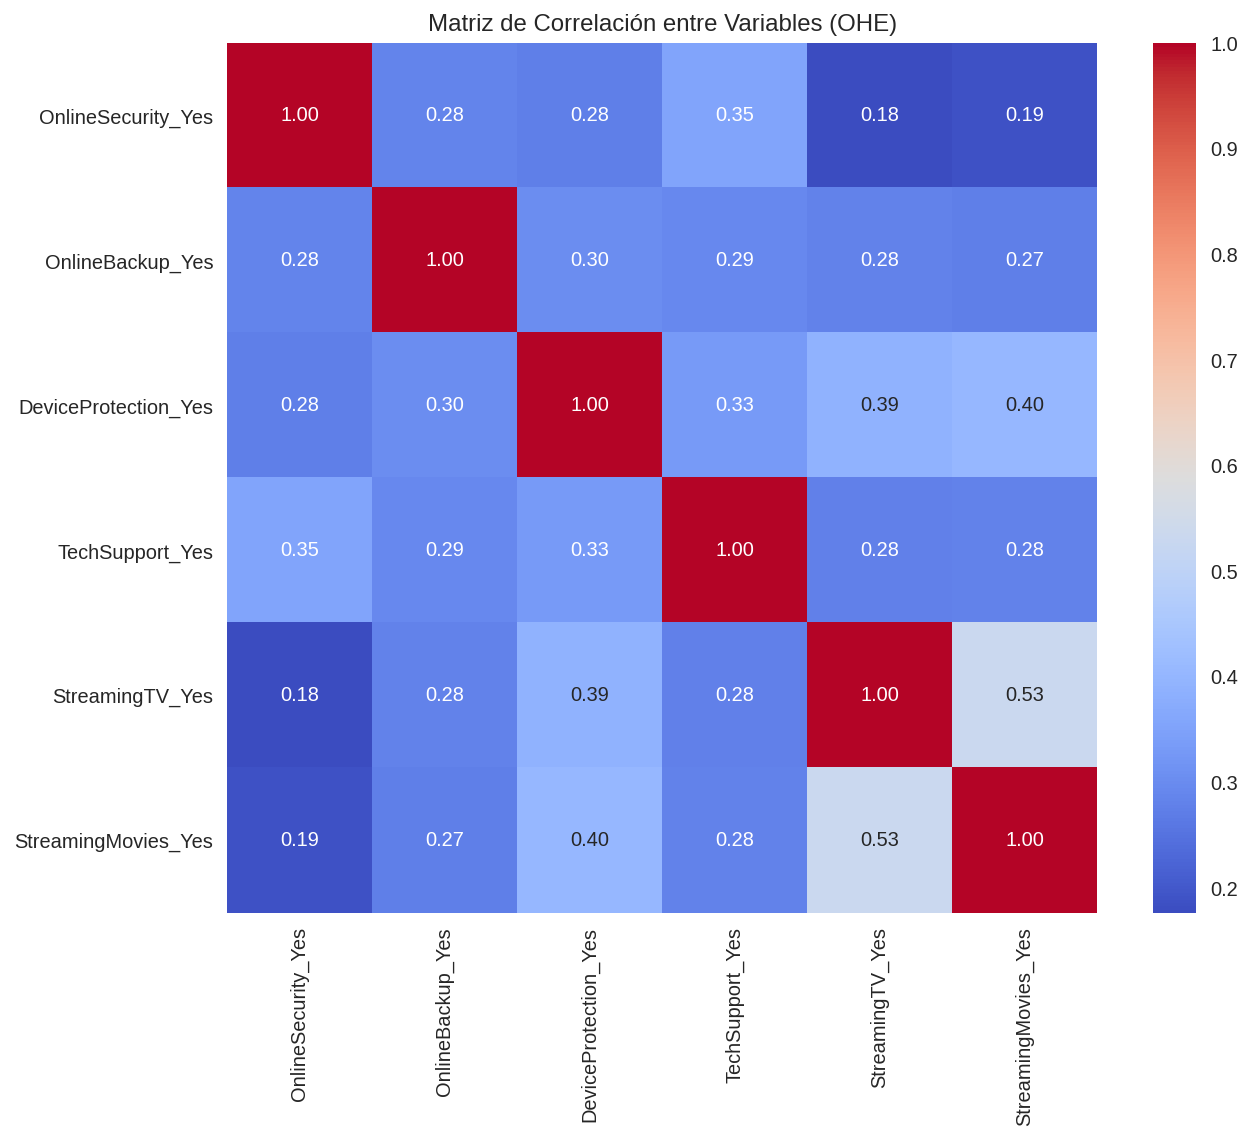

In [35]:
# Aplicar One-Hot Encoding a las variables categóricas
total_df_encoded = pd.get_dummies(total_df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']], drop_first=True)

# Calcular la matriz de correlación
correlation_matrix = total_df_encoded.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlación entre Variables (OHE)')
plt.show()

De este gráfico se puede obtener alguna información importante:
- Hay dos servicios que estan fuertemente correlacionados que son las de StreamingTV y lade StreamingMovies, con una correlación de 0.53. Esta información indica que las personas que contratan el servicio de películas tambien contratan el servicio de TV.
- Tambien se ha detectado una baja correlación entre las personas que contratan los servicios de TV y  Movies, y el servicio de OnlineSecurity. Podría significar que estos dos servicios no presentan peligros de seguridad informática, por lo que los usuarios no contratan estos servicios.
- En cuanto a los demas servicios tiene un nivel de correlación entre 0.3 y 0.4, con lo que se podría decir que muchos servicios se contratan de forma grupal, pero esto no ocurre en la mayoría de casos

Un indicador importante podría ser la cantidad de servicios que tiene contratado los usuarios, por lo que se creará una nueva columna con la suma de servicios adicionales que tiene un cliente
 

In [36]:
servicios = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
total_df["num_servicios"]=total_df[servicios].apply(lambda row: row.eq("Yes").sum(), axis=1)
total_df["num_servicios"]

0       1
1       2
2       2
3       3
4       0
       ..
7038    5
7039    4
7040    1
7041    0
7042    5
Name: num_servicios, Length: 7043, dtype: int64

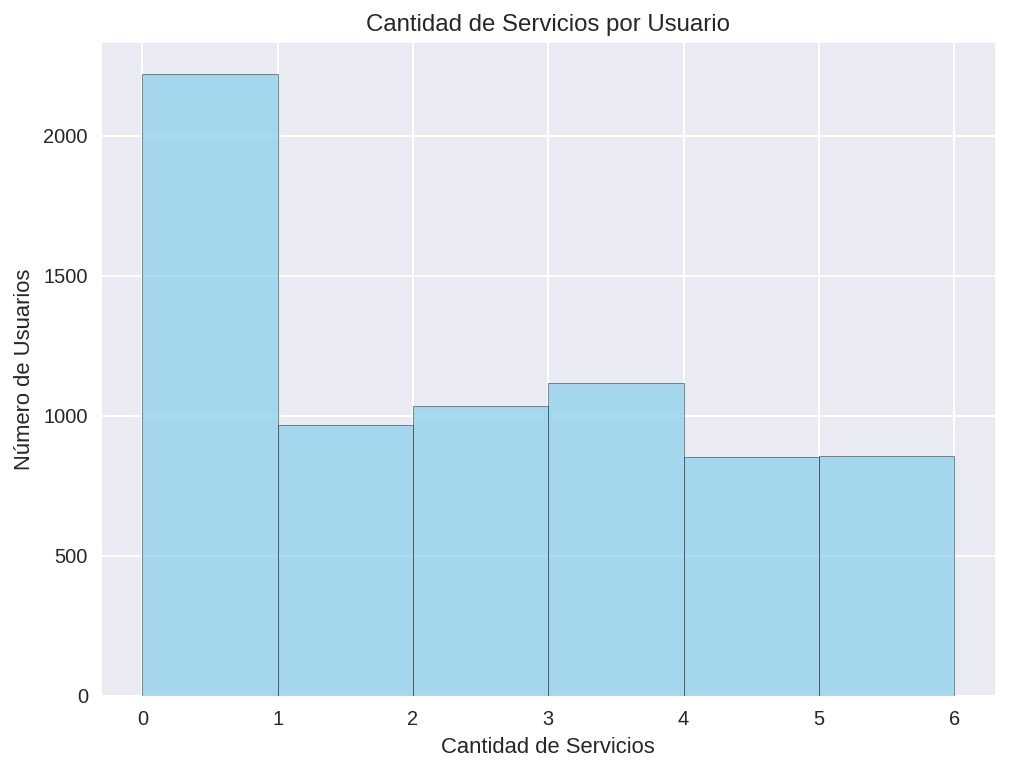

In [37]:
# Suponiendo que tienes un DataFrame llamado total_df que contiene la columna 'num_services'

# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(total_df['num_servicios'], bins=range(7), color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Cantidad de Servicios por Usuario')
plt.xlabel('Cantidad de Servicios')
plt.ylabel('Número de Usuarios')
plt.xticks(range(7))
plt.grid(True)
plt.show()

Con esto se observa que en su mayoría los clientes tienen entre 0-1 servicios. Los demas clientes se reparten de manera similar la cantidad de servicios contratados. Algo interesante de esta información es que existe casi la misma cantidad de personas que contratan de 1-2 servicios que personas que contratan de 5-6 servicios.  

Utilizando la codificación realizada anteriormente se va a revisar cual es el servicio más popular entre los clientes

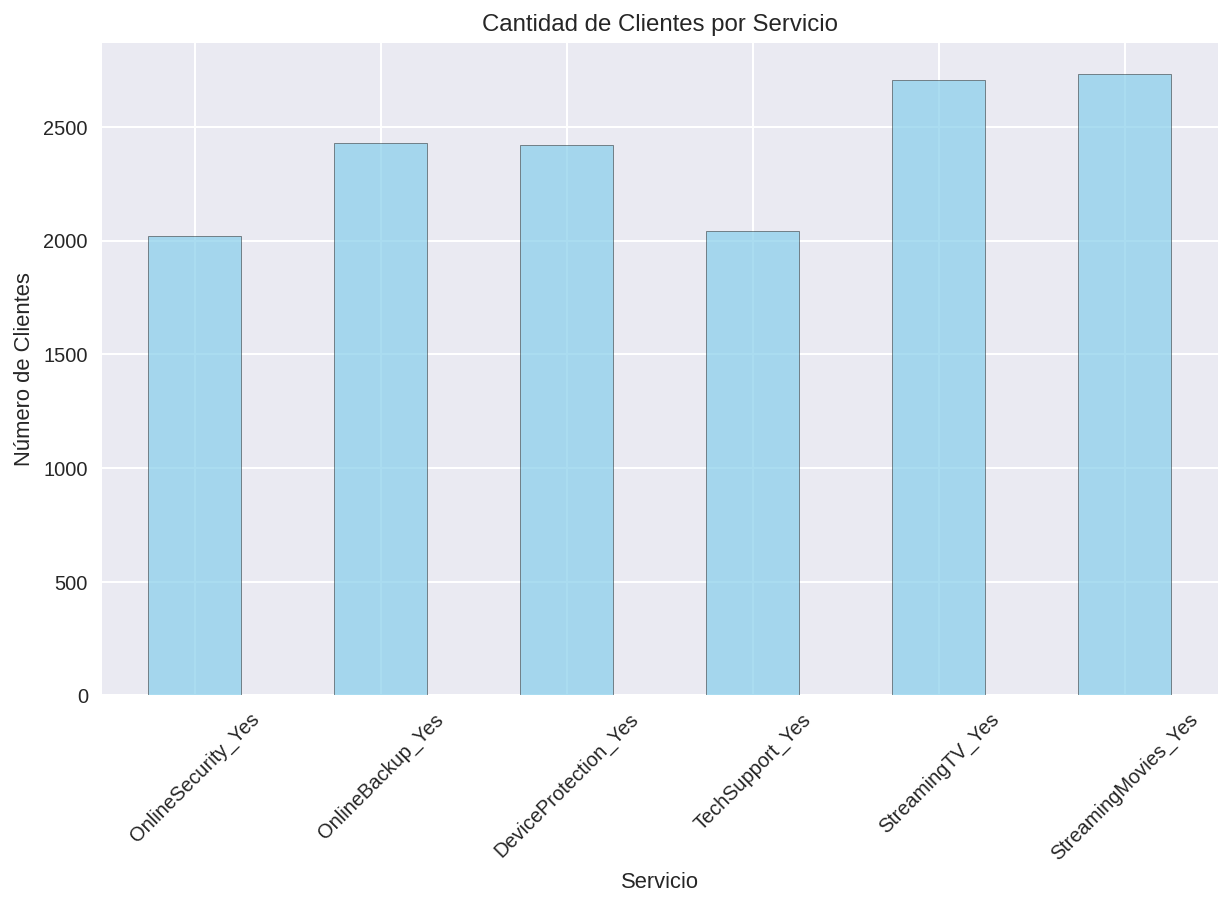

In [38]:
# Calcular la cantidad de clientes por servicio
services_count = total_df_encoded[['OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes']].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
services_count.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Cantidad de Clientes por Servicio')
plt.xlabel('Servicio')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Las gráficas obtenidas nos indican que los usuarios prefieren los servicios de StreamingTV y StreamingMovies, sobre los demás servicios.

#### Análisis de információn personal

A continuación revisaremos información personal de los usuarios, con el fin de estudiar como se encuentra la distribución de los datos:

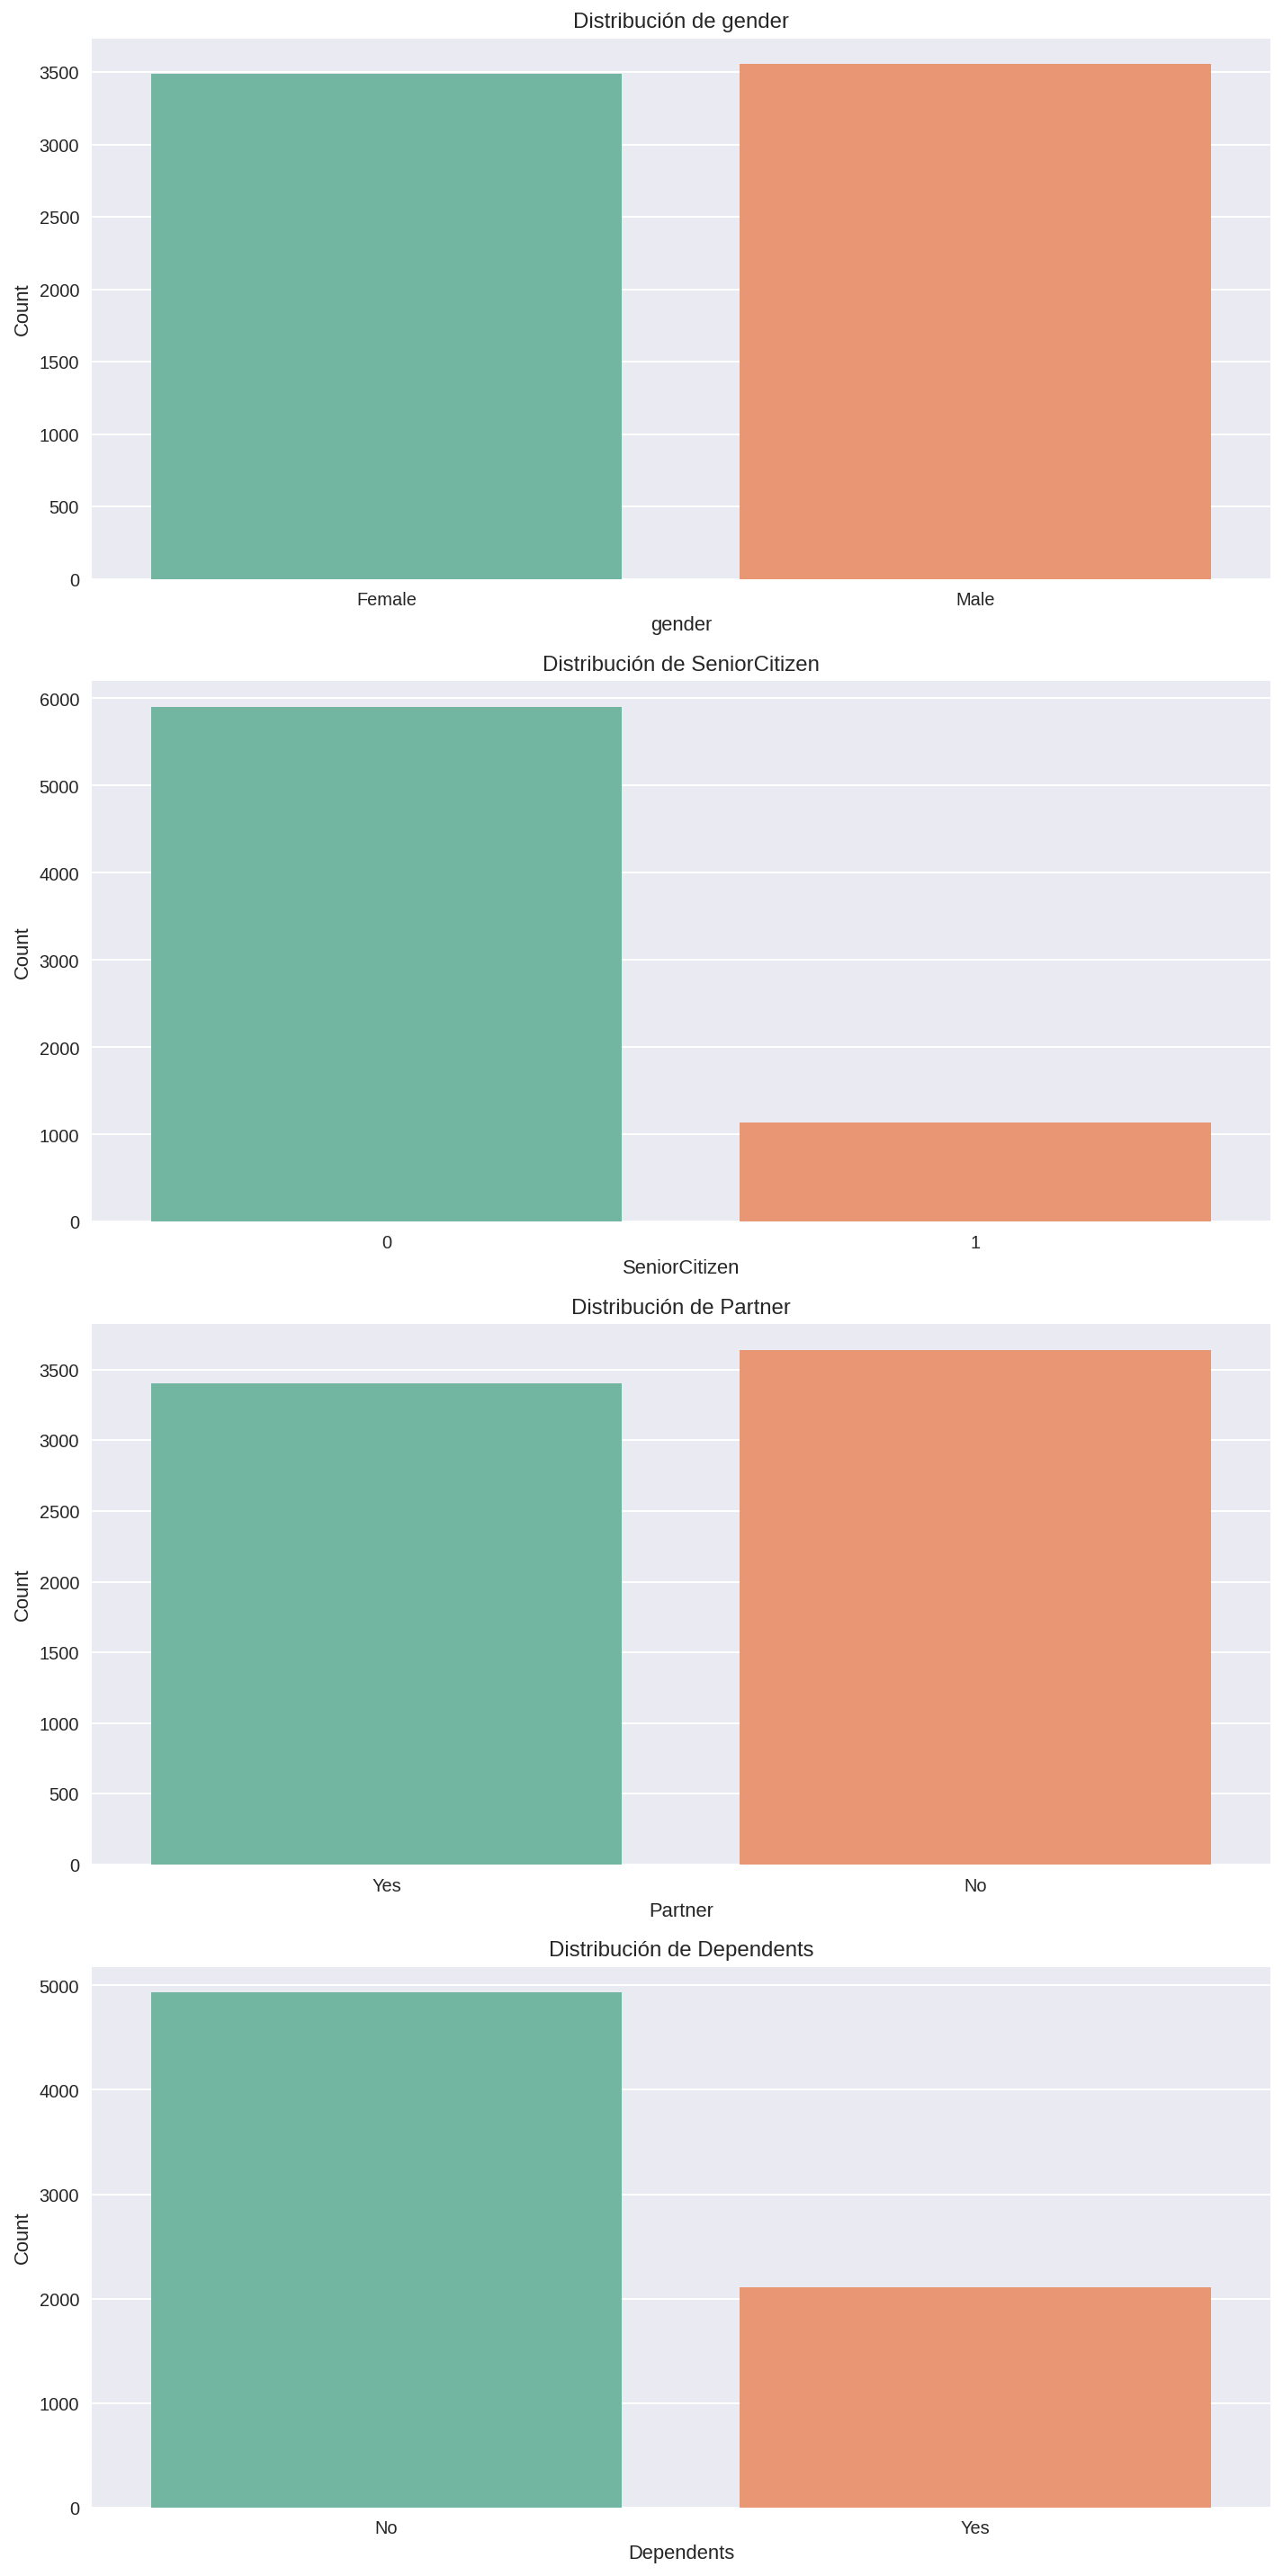

In [39]:
# Supongamos que tienes un DataFrame llamado 'total_df' que contiene la información personal de los clientes

# Definir las características a analizar
personal_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Crear subplots para cada característica
fig, axs = plt.subplots(len(personal_features), 1, figsize=(10, len(personal_features) * 5))

# Iterar sobre cada característica y crear un gráfico de barras
for i, feature in enumerate(personal_features):
    sns.countplot(x=feature, data=total_df, ax=axs[i], palette='Set2')
    axs[i].set_title(f'Distribución de {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

De las gráficas generadas se puede obtener las siguientes observaciones:
- La distribución entre hombres y mujeres es similar.
- En su mayoría, los usuarios no pertenecen a la tercera edad (SeniorCitizen)
- Por un margen muy pequeño, en su mayoría los usuarios son solteros.
- En su mayoría los usuarios de la empresa no tienen hijos.

#### Analisis de uso de múltiples líneas

Finalmente se revisará la columna MultipleLines. Esta columna contiene datos de yes/no, sin embargo tambien posee datos tipo NaN, y son una cantidad considerable como para ser descartada, por lo cual se optará por rellenar los datos NaN con el valor 'Unknown'.

In [40]:
total_df['MultipleLines'].fillna('Unknown', inplace=True)
total_df['MultipleLines']

0       Unknown
1            No
2            No
3       Unknown
4            No
         ...   
7038        Yes
7039        Yes
7040    Unknown
7041        Yes
7042         No
Name: MultipleLines, Length: 7043, dtype: object

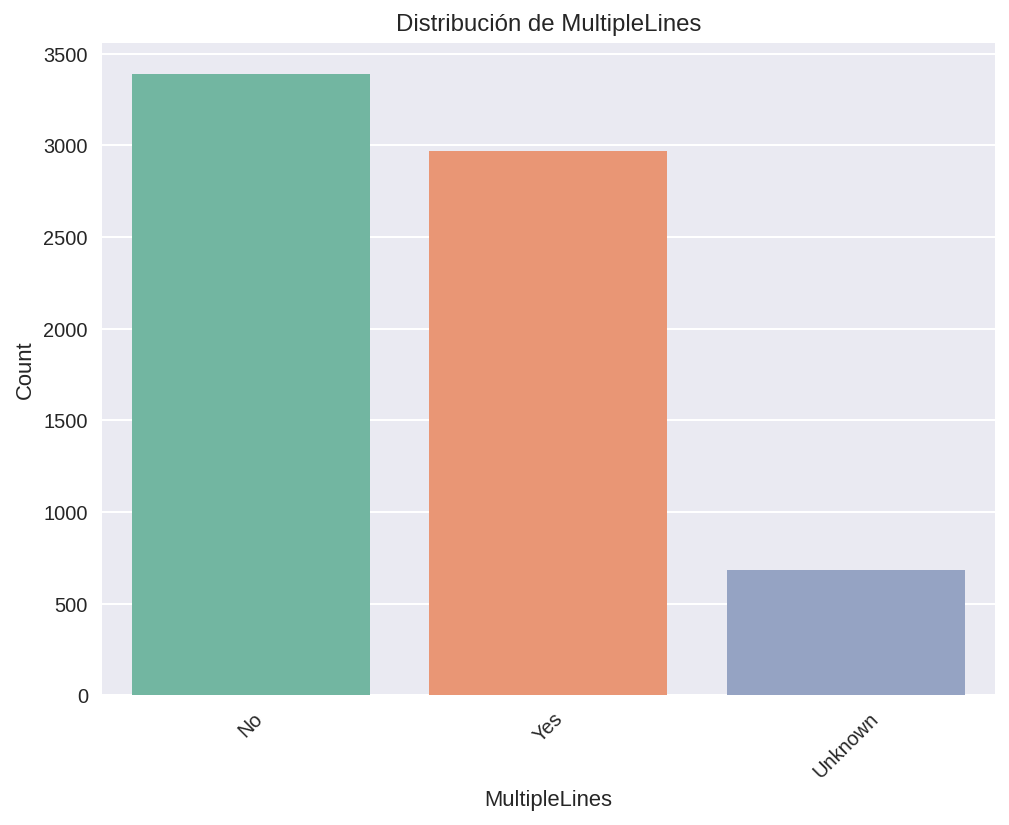

In [41]:
# Contar los valores de la columna 'MultipleLines' incluyendo NaN
multiple_lines_count = total_df['MultipleLines'].value_counts(dropna=False)

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=multiple_lines_count.index, y=multiple_lines_count.values, palette='Set2')
plt.title('Distribución de MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.show()

De los resultados obtenidos se tienen datos de interés. Una gran cantidad de usuarios posee más de una linea, siendo casi similar a la cantidad de usuarios que tienen una sola línea. Para este caso existen usuarios de los cuales desconocemos si poseen más de una línea. Se ha decidido no eliminar estas filas ya que es una gran cantidad de información, o rellenar con un dato de Yes/No estos valores ausentes, debido a que no se tiene información con la cual podamos saber con certeza en que categoría colocar al usuario.

Con todos los cambios realizados, la base de datos que se va a utilizar para el proyecto queda de la siguiente manera:
    

In [42]:
total_df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,gender,SeniorCitizen,Partner,Dependents,MultipleLines,estado_contrato,EndDate_2,DuracionContrato,Cancelado,num_servicios
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,Female,0,Yes,No,Unknown,True,2020-02-01,31,False,1
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,DSL,Yes,...,Male,0,No,No,No,True,2020-02-01,1036,False,2
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,...,Male,0,No,No,No,False,2019-12-01,61,True,2
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,Male,0,No,No,Unknown,True,2020-02-01,1371,False,3
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,...,Female,0,No,No,No,False,2019-11-01,61,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,One year,Yes,Mailed check,84.80,1990.50,DSL,Yes,...,Male,0,Yes,Yes,Yes,True,2020-02-01,730,False,5
7039,2234-XADUH,2014-02-01,NaT,One year,Yes,Credit card (automatic),103.20,7362.90,Fiber optic,No,...,Female,0,Yes,Yes,Yes,True,2020-02-01,2191,False,4
7040,4801-JZAZL,2019-03-01,NaT,Month-to-month,Yes,Electronic check,29.60,346.45,DSL,Yes,...,Female,0,Yes,Yes,Unknown,True,2020-02-01,337,False,1
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.60,Fiber optic,No,...,Male,1,Yes,No,Yes,False,2019-11-01,123,True,0


### Preguntas aclaratorias

Despues de realizar el análisis de datos respectivo, surgieron algunas preguntas respecto a la información entregada. A pesar de que se puede intuir ciertos datos, es preferible que la información quede 100% clara para proseguir con el proyecto. A continuación se enlista los puntos que requieren de aclaración.
- La columna EndDate en algunas de sus filas tiene como dato la palabra "No". Para el análisis se supuso que se trataba de clientes que no cerraban su contrato aún. ¿Es esto correcto?
- En cuanto a la columna de MonthlyCharges, a pesar de que se puede deducir que los costos dependen de que servicios tenga contratado el cliente, facilitaría el análsis saber cuales son los precios de los servicios. Esto podría dar más ideas de el por qué algunos clientes prefieren unos servicios que otros.
- En la columna TotalCharges existen valores ausentes. Como consecuencia del punto anterior, no podemos rellenar estos datos ausentes mediante calculos de los costos, por lo que se optó en mantener estos datos como tipo NaN. Existió algun problema al momento de recopilar esta información? Si este es el caso, se podría revisar en la base de datos original ya que pudo haber sido un problema de importe de datos.
- En cuanto a los servicios ofrecidos. En los datos originales se observó que existen usuarios que no tienen información sobre servicios contratados. Se asumió que estos clientes no tenian niguno de los servicios adicionales contratados, por lo que se relleno estos datos ausentes con NaN. La pregunta sería si esta suposición es correcta, caso contrario se estaría completando la información con datos erroneos.
- Finalmente en la columna de MultipleLines, también se encontró datos ausentes, sin embargo, no se tiene la información necesaria para clasificar estos datos en alguno de las dos características, por lo que se creó una nueva con la palabra "unknown". La pregunta sería si esto fue un problema en la importación de los datos, o si en realidad no existe esta información.

### Plan de trabajo

Una vez realizado el análisis de datos el siguiente objetivo es realizar un plan de trabajo para predecir la tasa de cancelación de los clientes, para lo cual se seguiran los siguientes pasos:

#### Preparación de datos

1. Actualmente ya se realizó una correción de los datos, eliminando valores ausentes y verificando que no existan datos duplicados, sin embargo es necesario realizar cambios en el dataframe final para facilitar la escritura de codigo. Esto incluye, cambiar el nombre de las columnas y poner todo en minusculas.
2. Dado que se va a entrenar un modelo de prediccón es necesario realizar una codificación de las características. Se debe codificar las características categóricas y normalizar las características numéricas.
3. Se requiere tambien de dividir los datos en dos conjuntos, el de entrenamiento y el de prueba para validar el modelo.

#### Selección y entrenamiento de modelos

1. Se debe elegir un modelo de aprendizaje para la terea de predicción. Para este caso, el modelo debe ser de clasificación, ya que debemos saber si un cliente va a cancelar o no su servicio.
2. Se va a probar diferentes modelos de clasificación como Regresión Logística, Árbol de decisión, Bosque Aleatorio, etc, ajustando los hiperparámetros con el fin de obtener los mejores resultados.



#### Validación del modelo:

1. Utilizando el conjunto de prueba avamos a probar los diferentes modelos con el fin de buscar cual es el mejor modelo para el entrenamiento 
2. Se va a evaluar el rendimiento de los modelos utilizando difernetes métricas como precisión, recall, F1-score, etc. De los datos que se generen se va a escoger el mejor modelo.


#### Interpretación de resultados

1. Una vez obtenidos los resultados, vamos a analizar las características que más contribuyeron a la predicción de la tasa de cancelación y con estas características se va a sugerir medidas proactivas con los cuales se puedan reducir las tasas de cancelación en los clientes actuales y en los futuros clientes.